<a href="https://colab.research.google.com/github/masnaashraf/LGMVIP--DataScience/blob/main/task1_LGMVIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

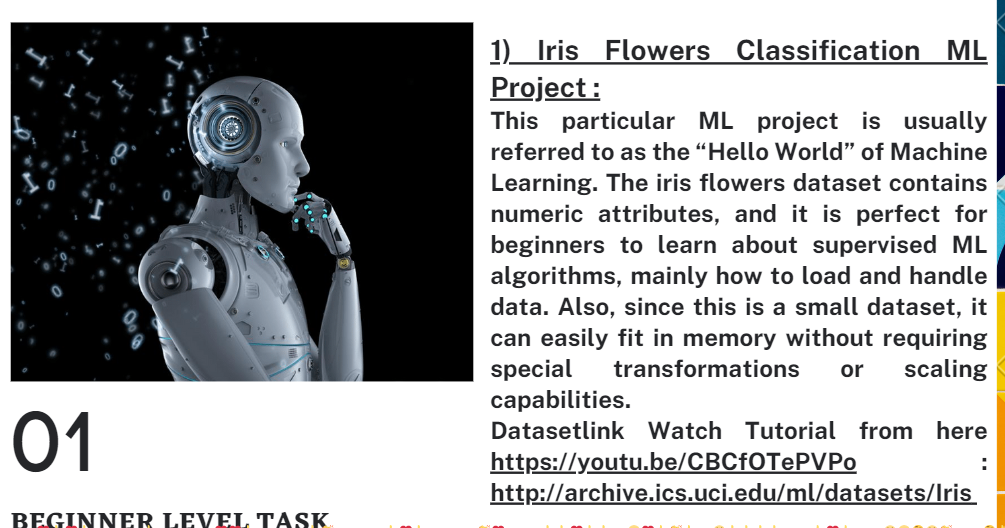

LGMVIP- DataScience
MASNA
Data Science intern

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

plt.figure(figsize=[20,10])
import warnings
warnings.filterwarnings('ignore')



<Figure size 1440x720 with 0 Axes>

**Reading Dataset**

In [ ]:
iris_df=pd.read_csv('/content/IRIS.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**dropping the id column which is irrelevent**

**EDA(Exploratory Data Analysis)**

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**seperating the data part from target**

In [ ]:
iris_data=iris_df.iloc[:,:-1]
iris_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_target=iris_df.iloc[:,-1]
iris_target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

**pair plot**

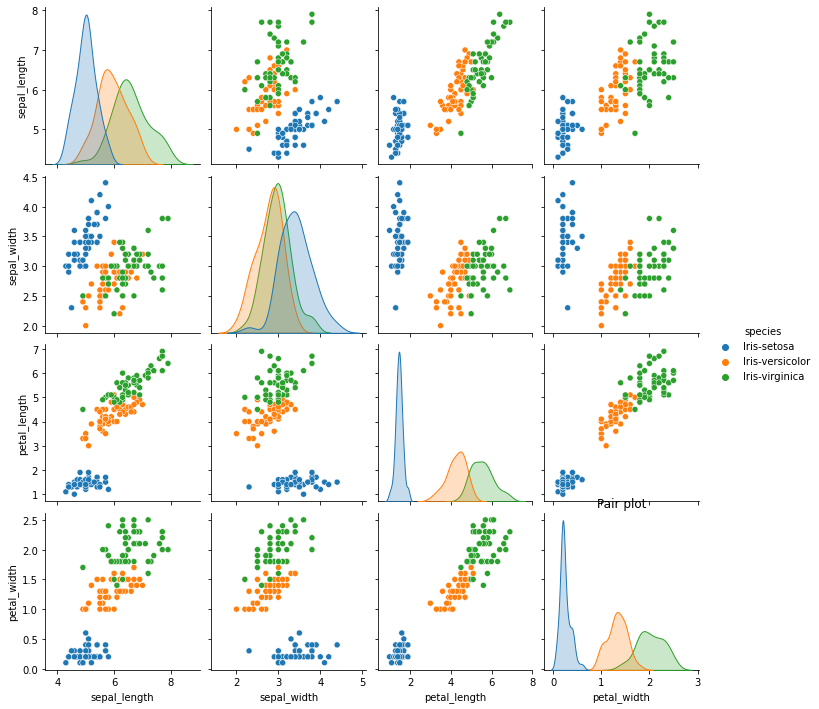

In [ ]:
#plt.figure(figsize=[20,10])
p=sns.pairplot(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']],
       vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       hue="species")
plt.title("Pair plot")
plt.show()

**Insights from pair plot:**
1.Setosa species is most distinguishable among the 3 varieties
2.The Versicolor and Vergica species are seen as mixed and is harder to distinguish

**correlation matrix**

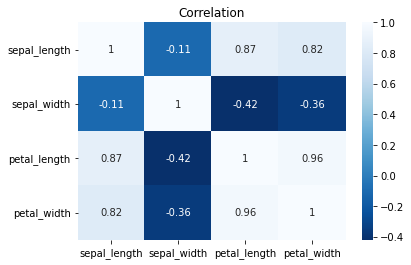

In [ ]:
sns.heatmap(iris_data.corr(),annot=True,cmap='Blues_r')
plt.title("Correlation")
plt.show()

In [ ]:
iris_data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**Insights on correlation:**
*we can see Petal length and petal width has high correlation with sepal length so we can choose Sepal length and sepal width while forming the cluster avoiding the other two features*

**Finding optimum number of clusters using Elbow method**

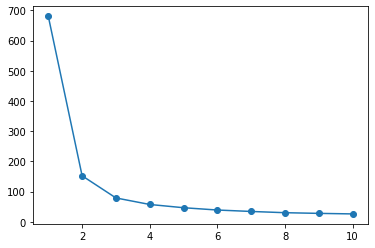

In [ ]:
list1=[]
x = iris_df.iloc[:, [0, 1, 2, 3]].values
#elbow method 

for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  Kmeans.fit(x)
  list1.append(Kmeans.inertia_)


#plotting into line graph to show result of elbow method
plt.scatter(range(1,11),list1)
plt.plot(range(1,11),list1)
plt.show()

from the above step we choose optimum number of clusters as **'3**'.This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. *italicized text*

**Fit the model:**
fitting the model with number of cluster as 3

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
# predicted clusters
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

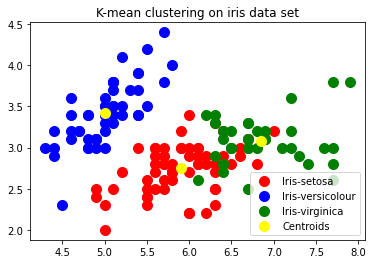

In [ ]:
# Visualising the clusters - On the first two columns(sepal length and sepal width)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("K-mean clustering on iris data set")
plt.legend()
plt.show()